# 7.1 확률적 데이터와 확률변수

### 연습문제 7.1.1

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
sy = pd.Series(iris.target, dtype = 'category')
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

In [2]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


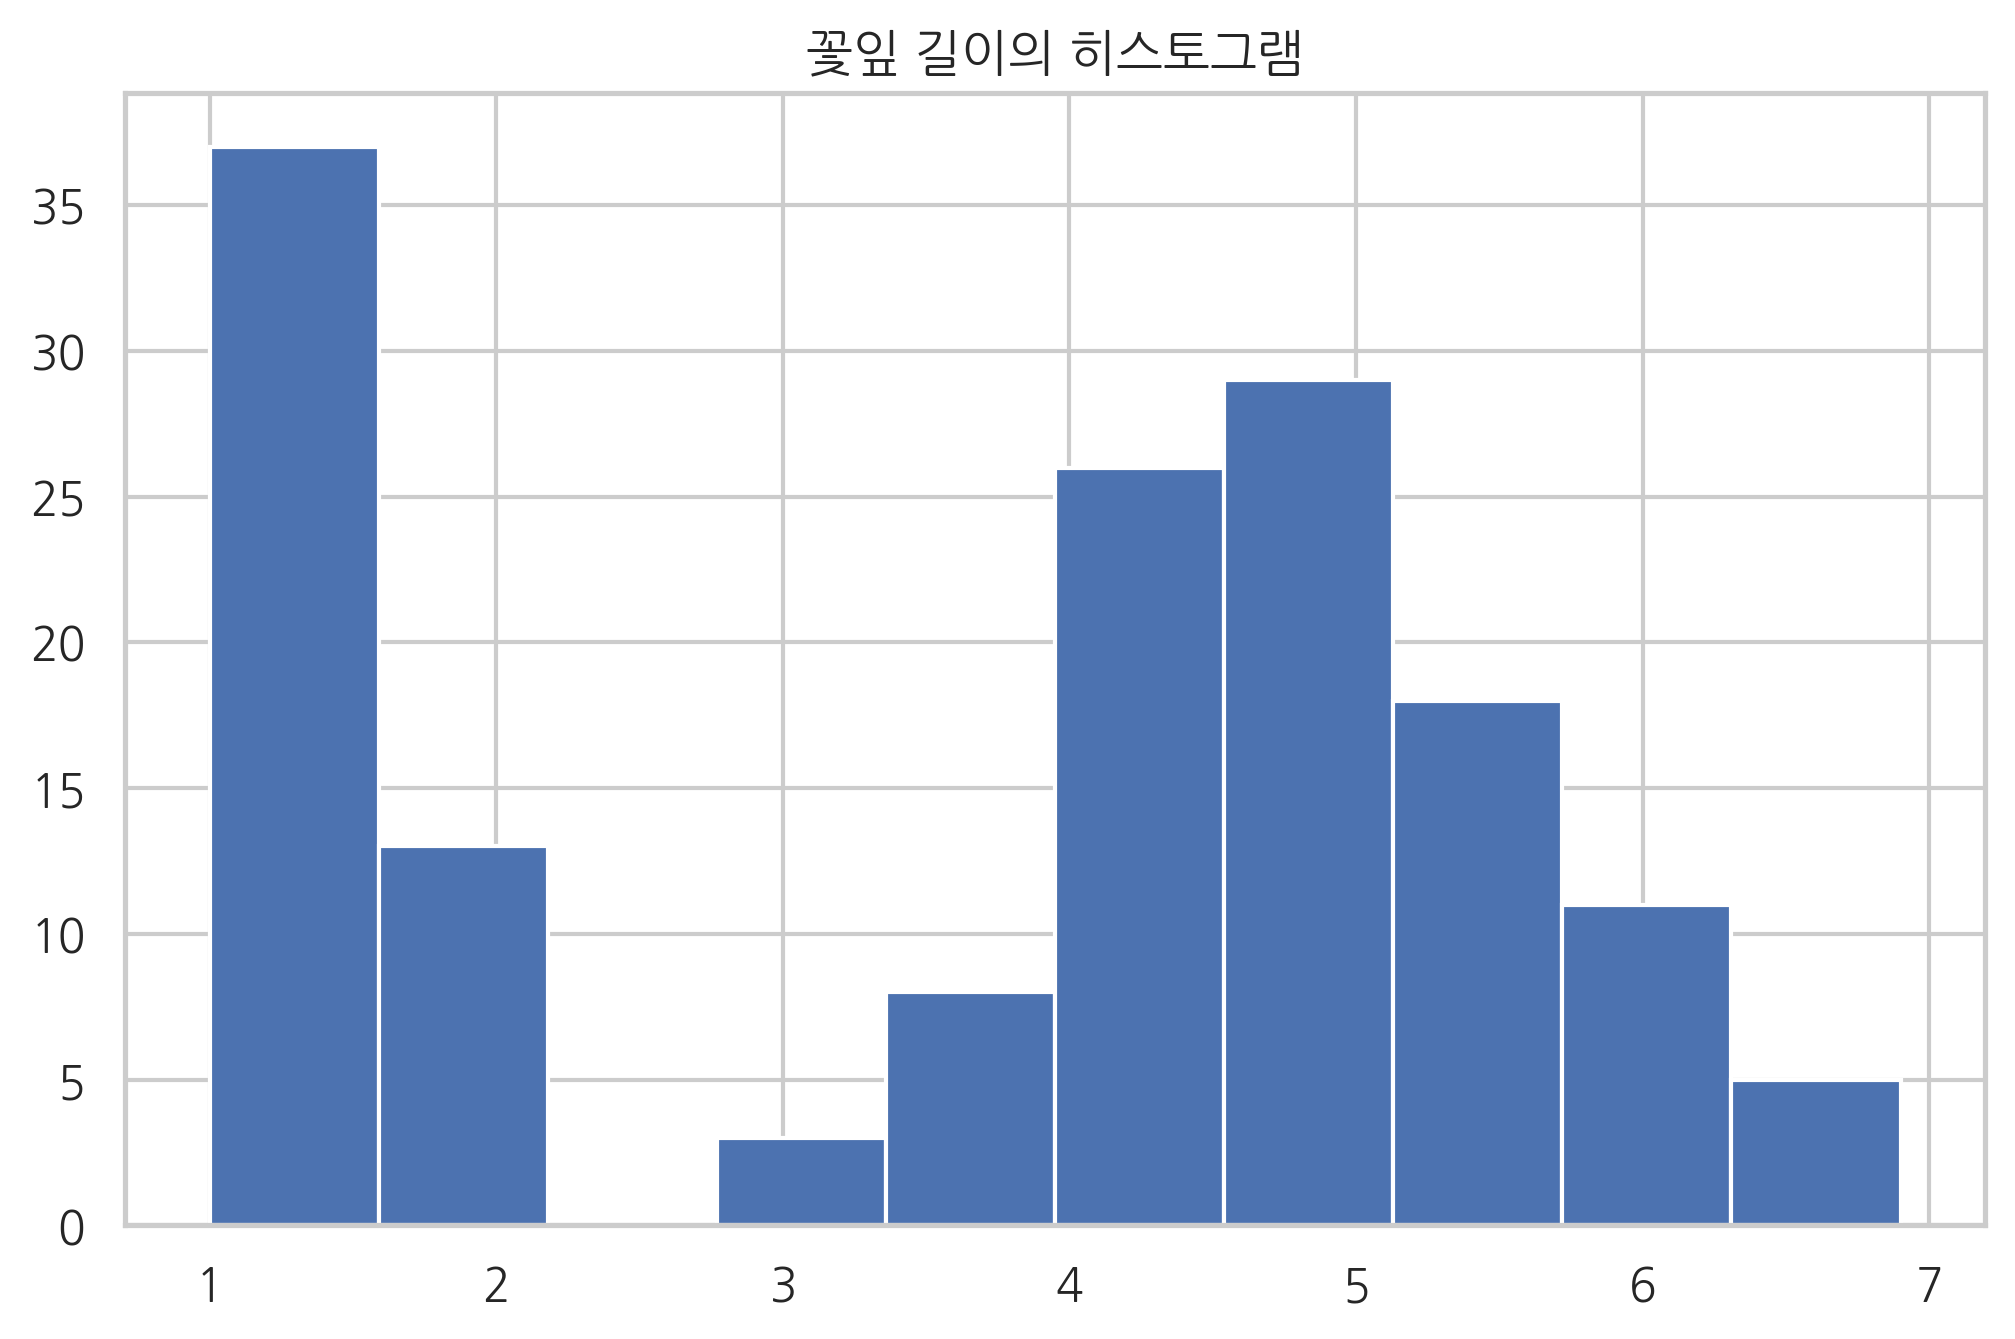

In [6]:
df['petal length (cm)'].hist()
plt.title('꽃잎 길이의 히스토그램')
plt.show()

In [ ]:
1. 꽃잎 길이의 분포는 단봉 분포이다.

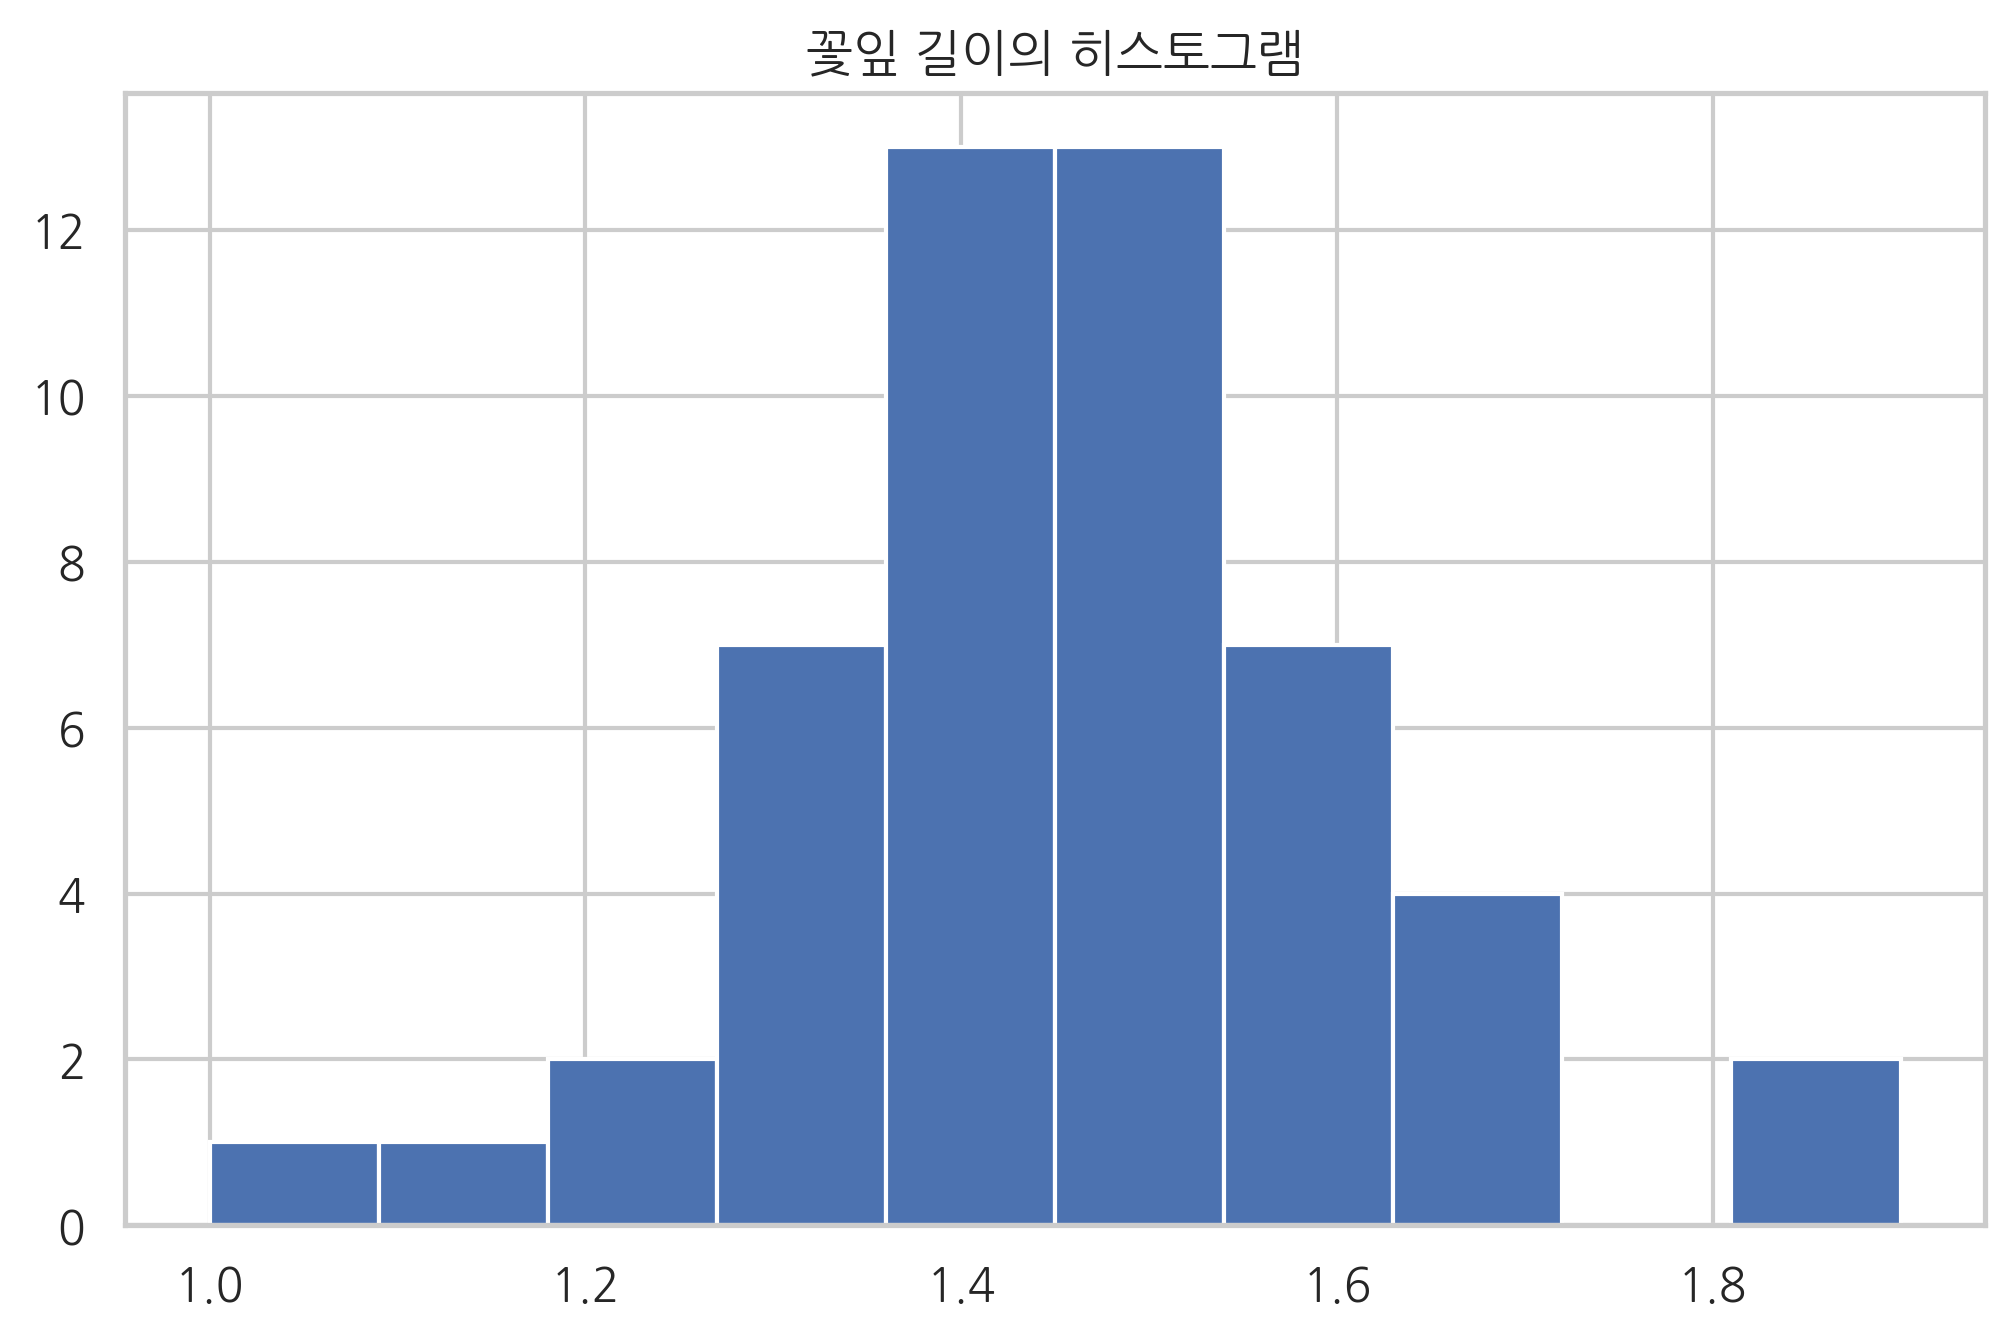

In [7]:
df[df.species == 'setosa']['petal length (cm)'].hist()
plt.title('꽃잎 길이의 히스토그램')
plt.show()

In [ ]:
2. setosa 종 꽃잎 분포의 길이도 단봉분포이다.

### 연습문제 7.1.2

In [7]:
x = df[df.species == 'virginica']['petal length (cm)']

def sample_statistics(x, n, x_min=0, x_max=10):
    bins = np.linspace(x_min, x_max, n+1)
    ns, _ = np.histogram(x, bins=bins)
    
    sample_mean = np.mean(x)
    sample_median = np.median(x)
    mode_index = np.argmax(ns)
    sample_mode = 0.5 * (bins[mode_index] + bins[mode_index+1])
    print('구간이 {}개일 때'.format(n))
    print('표본평균', sample_mean)
    print('표본중앙값', sample_median)
    print('표본최빈값', sample_mode)
    
    sns.distplot(x, bins = bins)
    plt.axvline(sample_mean, c='k',ls=':', label = '표본평균')
    plt.axvline(sample_median, c='k',ls='--', label = '표본중앙값')
    plt.axvline(sample_mode, c='k',ls='-', label = '표본최빈값')
    plt.title('표본평균, 표본중앙값, 표본최빈값의 차이')
    plt.xlabel('x')
    plt.legend()
    plt.show()

구간이 10개일 때
표본평균 5.552
표본중앙값 5.55
표본최빈값 5.5


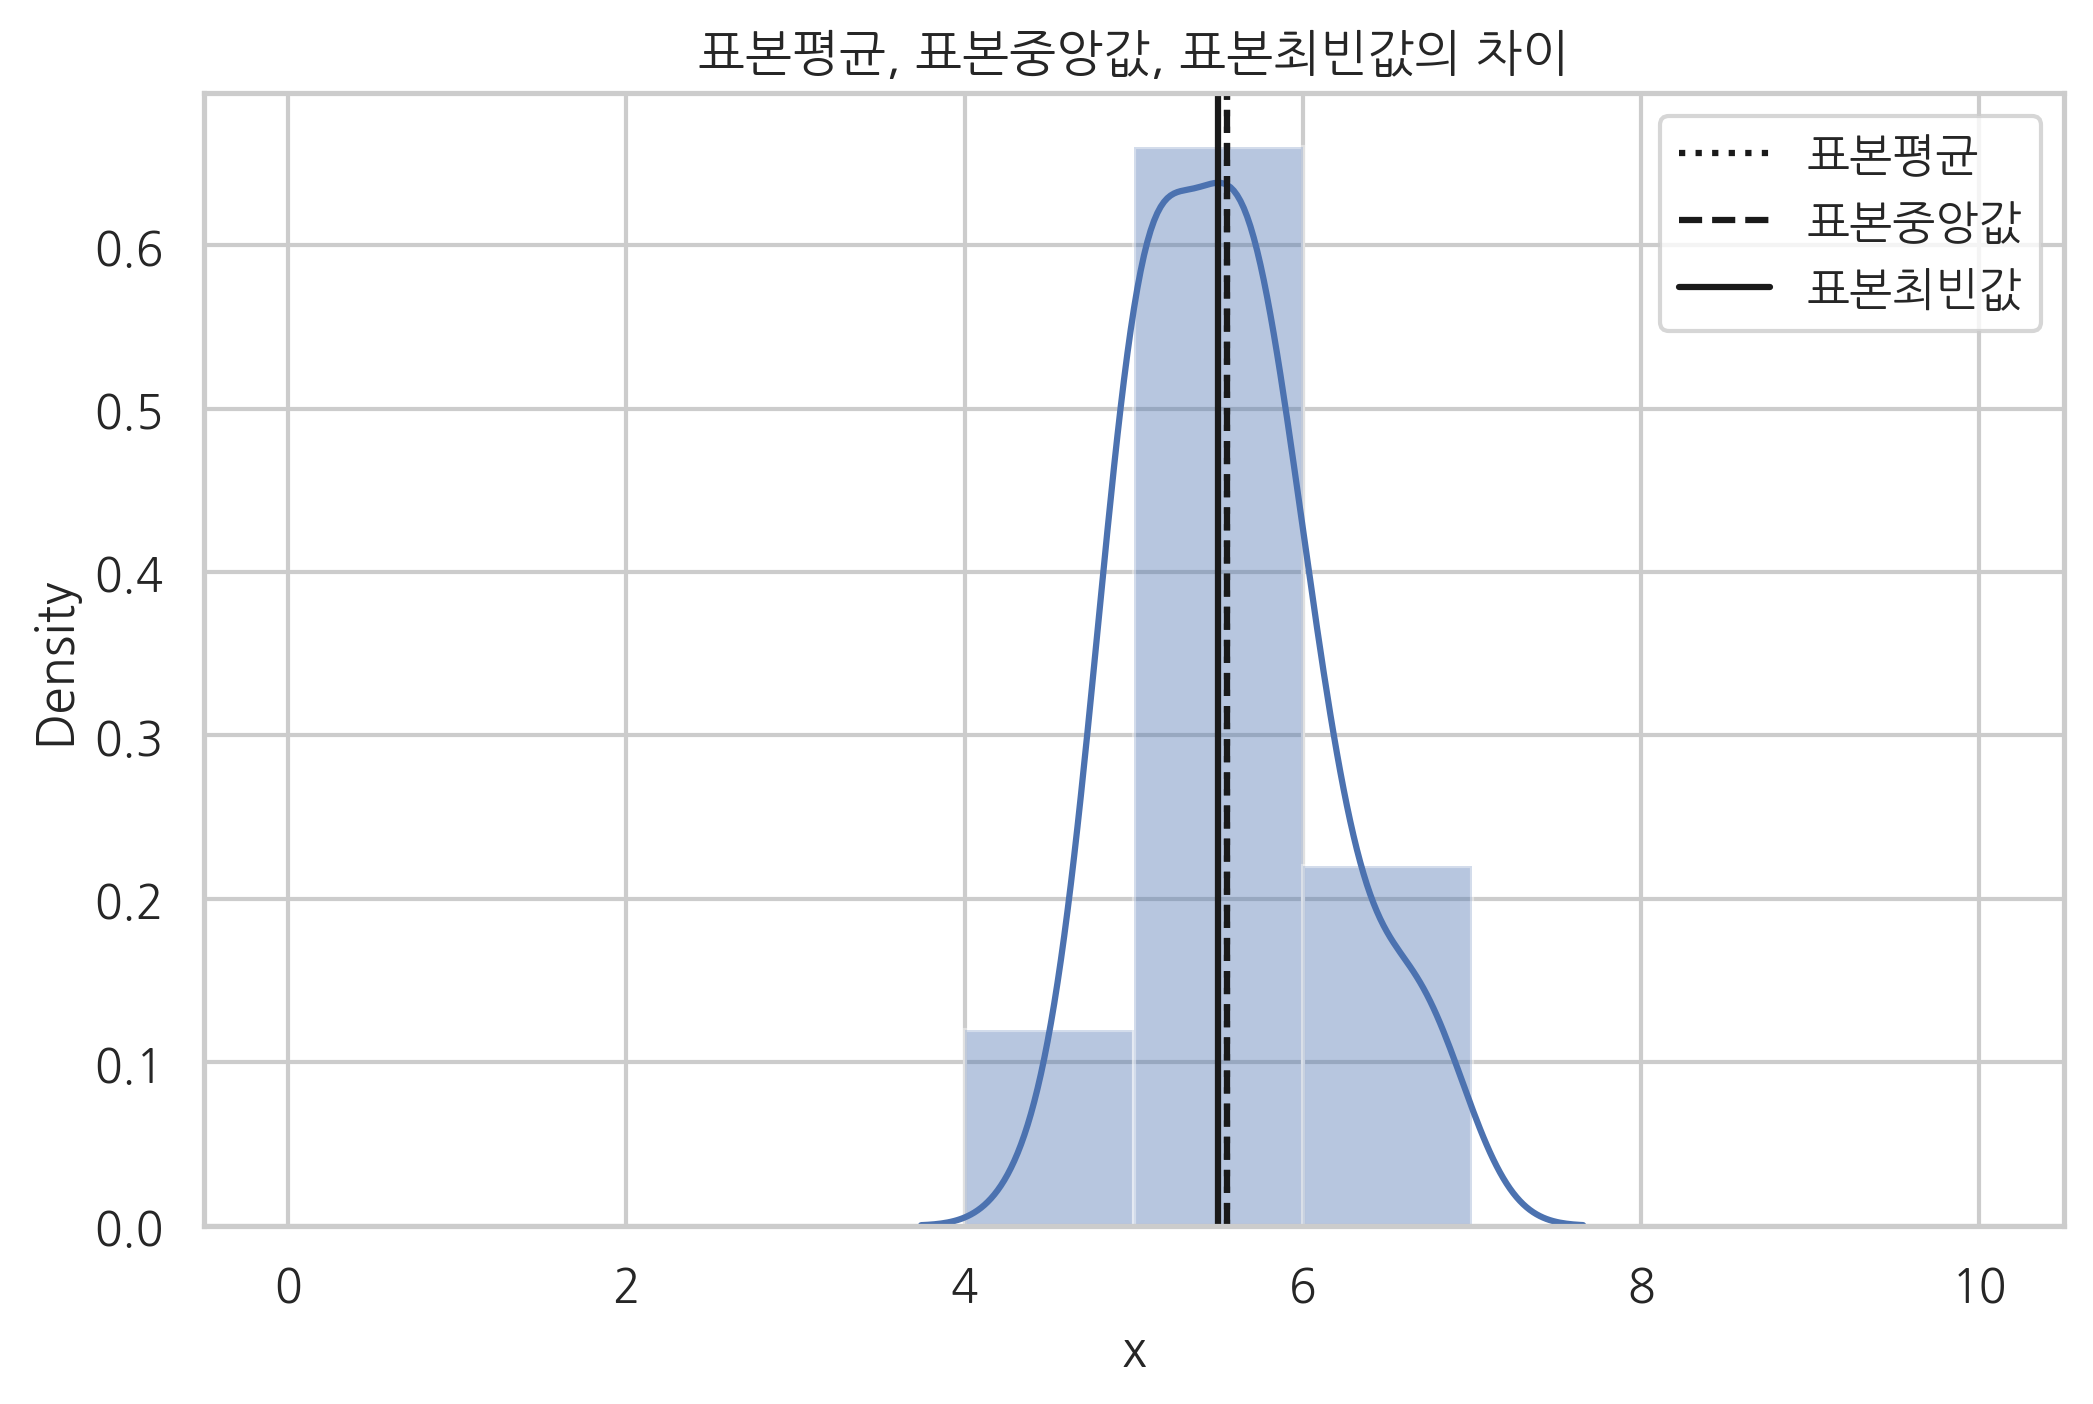

In [15]:
sample_statistics(x, 10)

구간이 50개일 때
표본평균 5.552
표본중앙값 5.55
표본최빈값 5.5


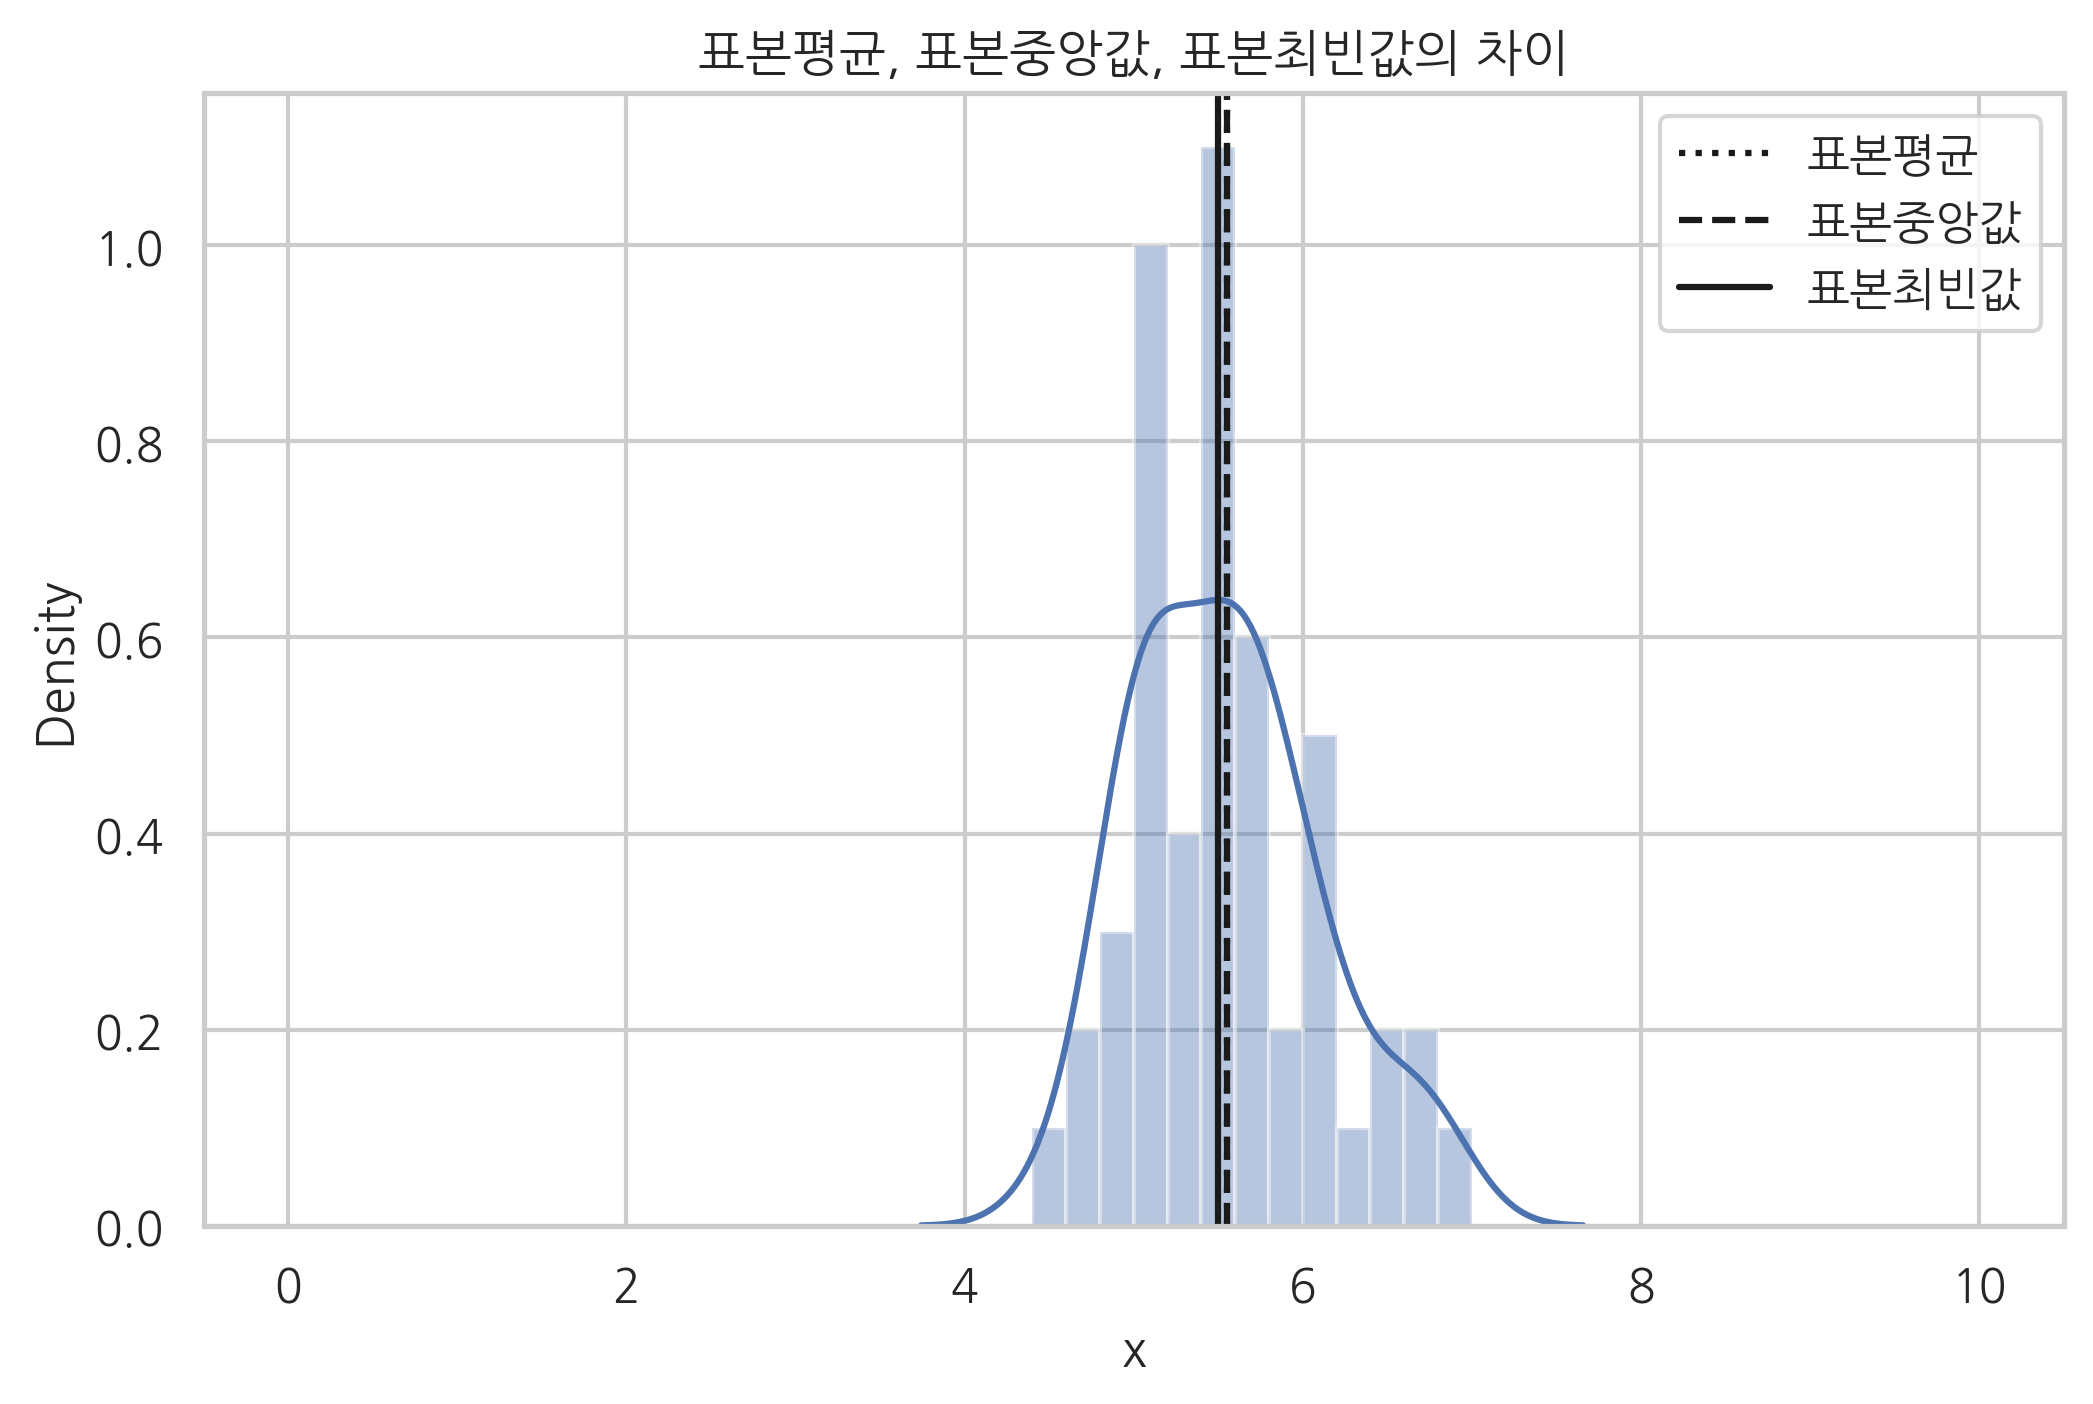

In [16]:
sample_statistics(x, 50)

구간이 100개일 때
표본평균 5.552
표본중앙값 5.55
표본최빈값 5.050000000000001


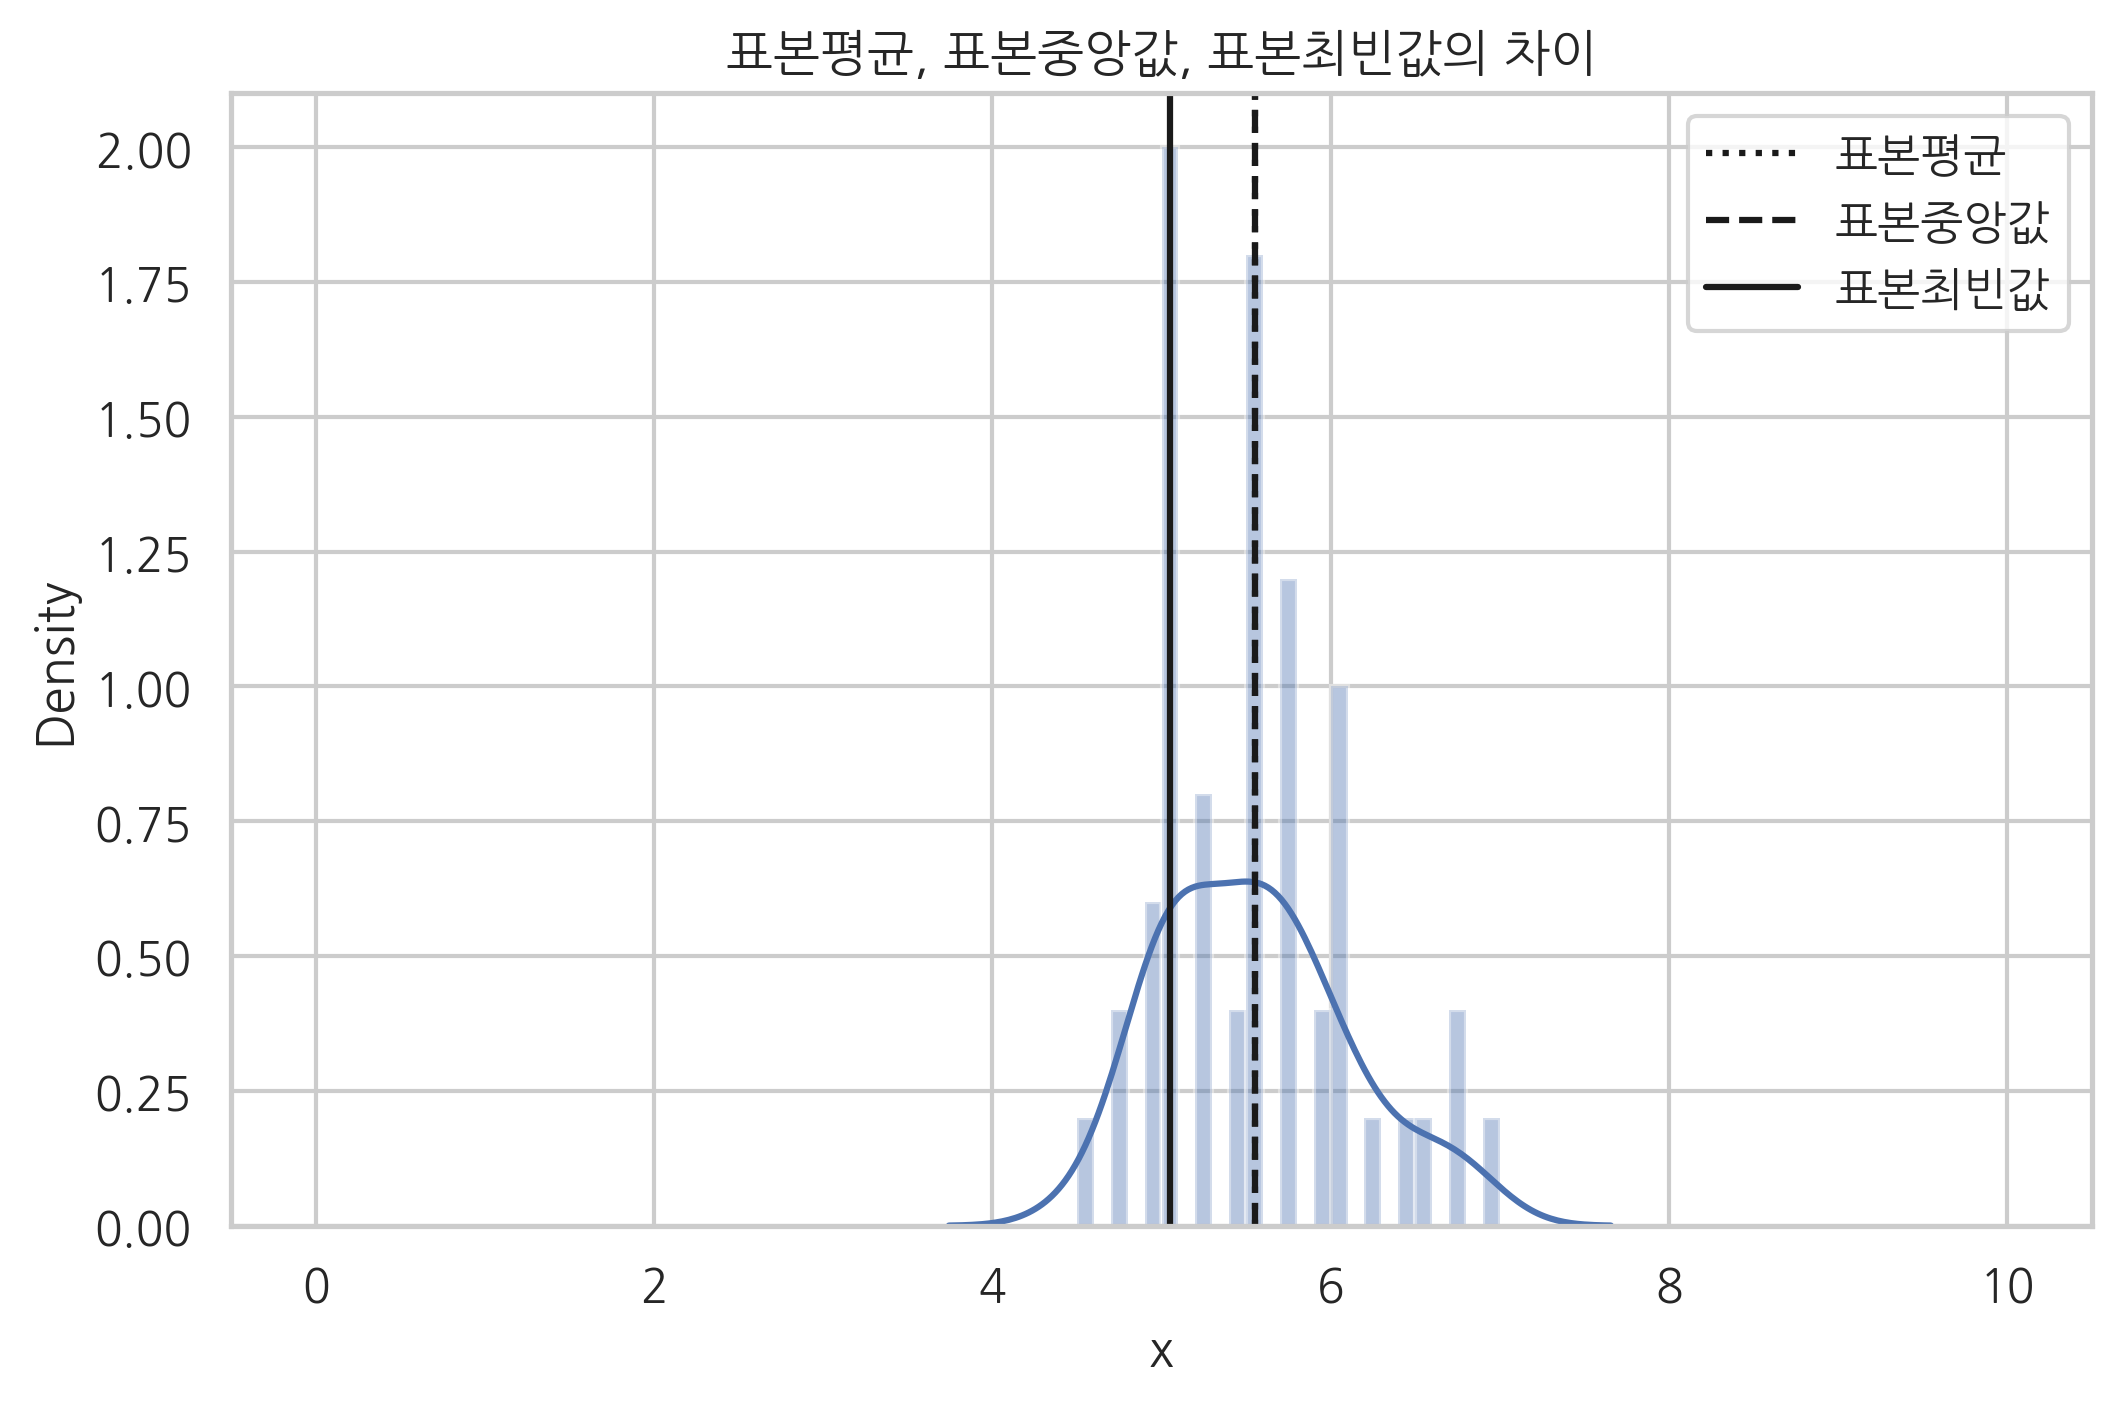

In [17]:
sample_statistics(x, 100)

### 연습문제 7.1.3

구간이 100개일 때
표본평균 0.0003616537405926892
표본중앙값 0.0008831938881747556
표본최빈값 0.000899999999999998


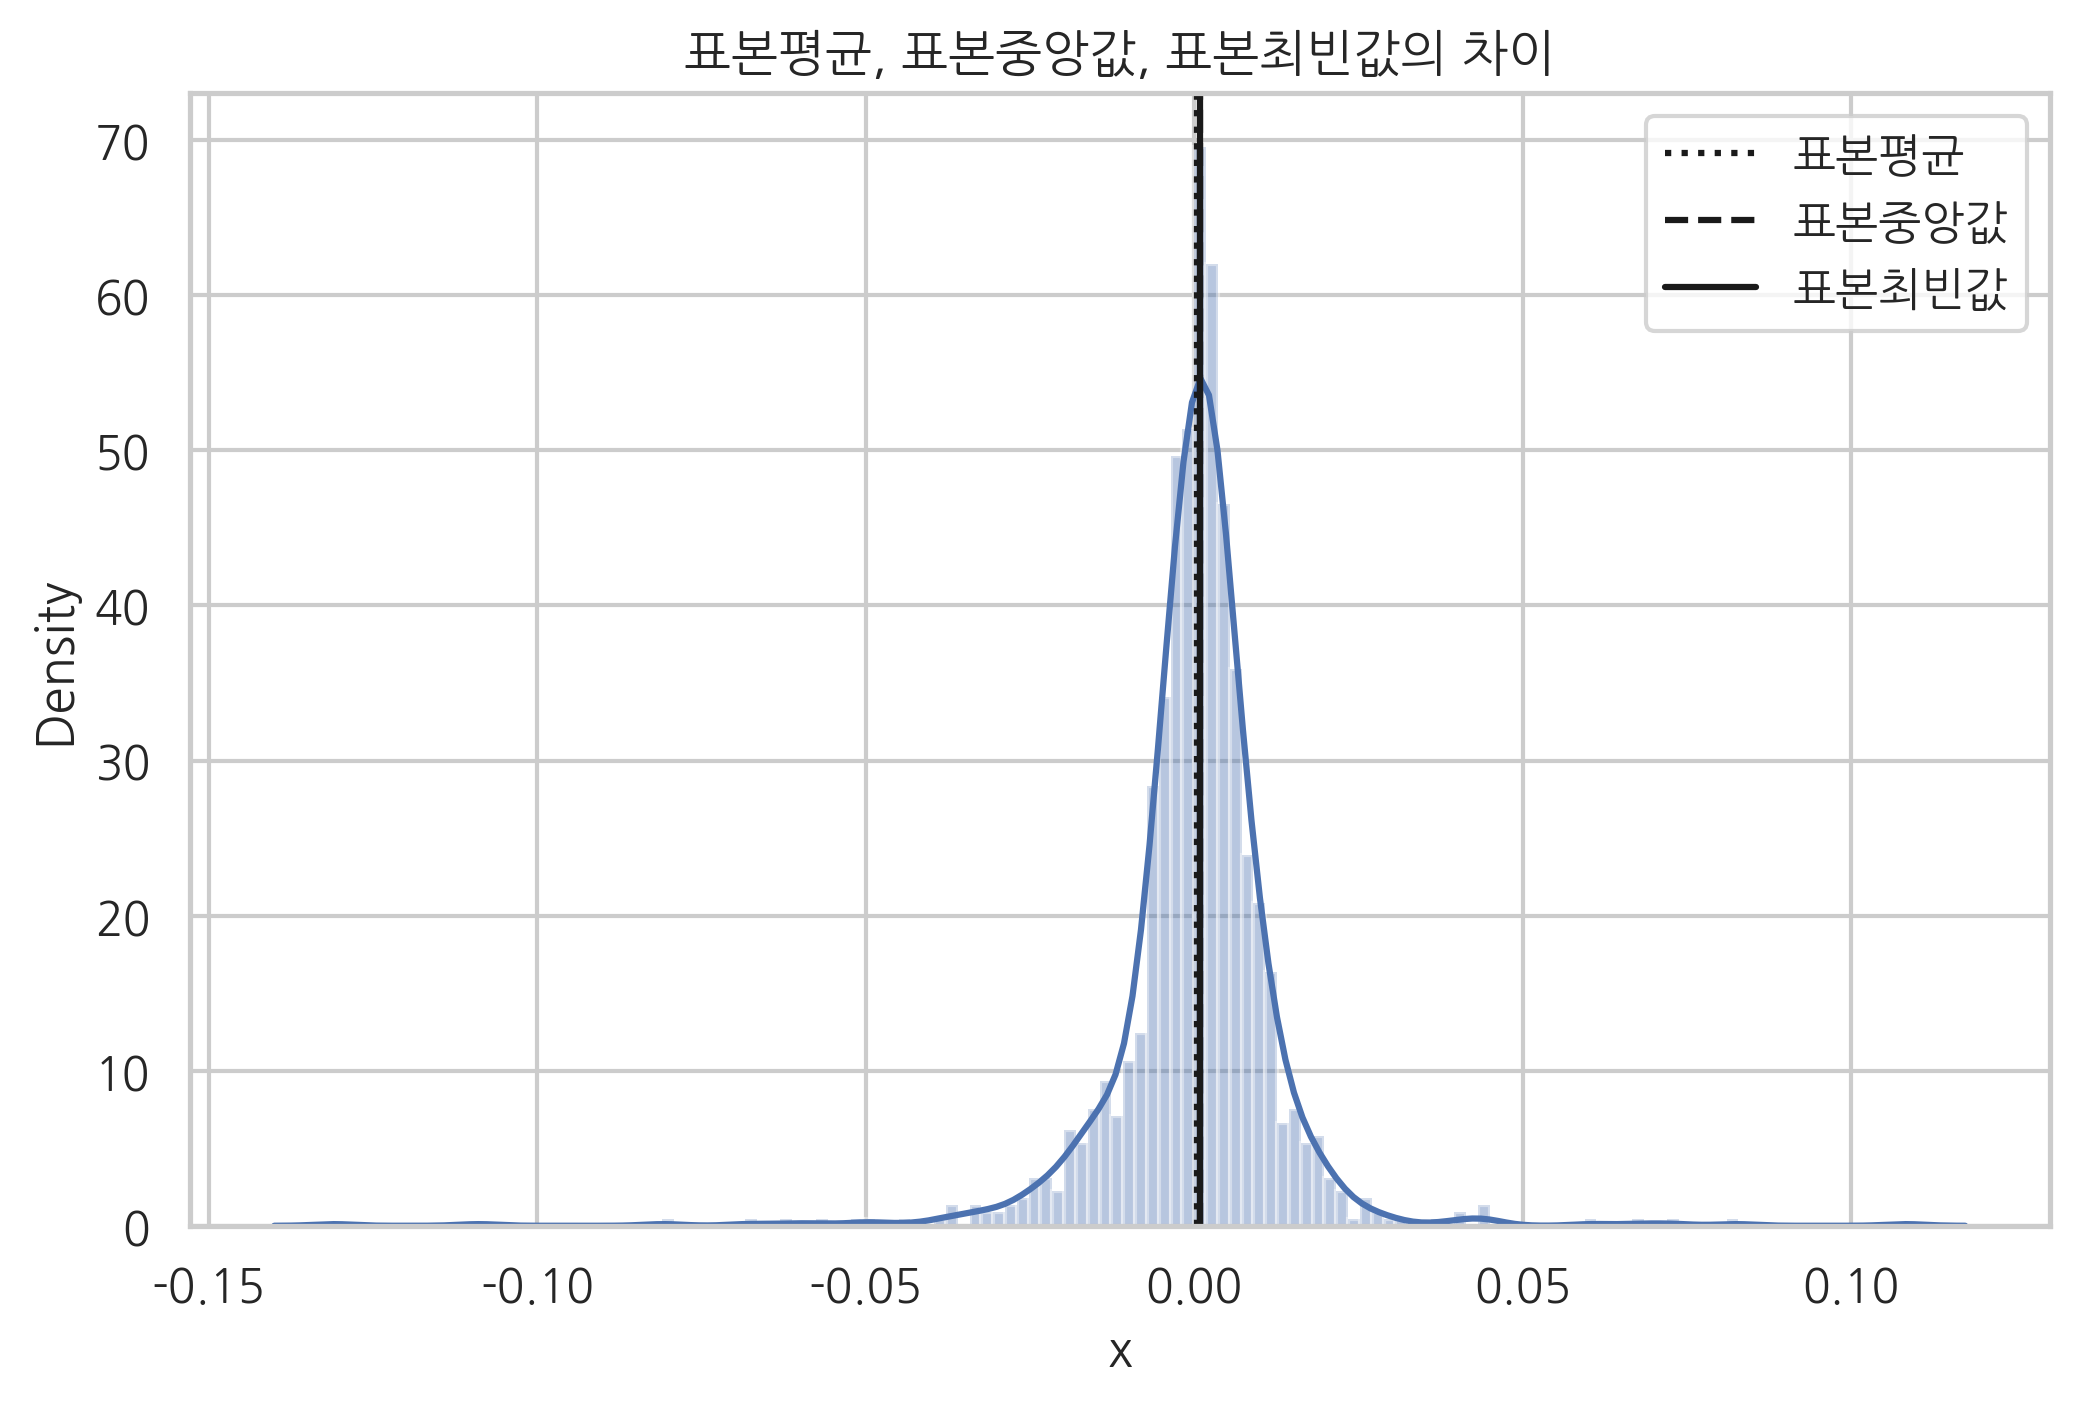

In [13]:
import pandas_datareader.data as web
df = web.DataReader('DJCA', data_source = 'fred').dropna()['DJCA']
r = np.log(df / df.shift(1)).dropna().valuesm
sample_statistics(r, 100, -0.09, 0.09)

In [14]:
volatility = np.std(r) * np.sqrt(256) * 100
volatility

20.129847305057975

### 연습문제 7.1.4

In [ ]:
5개 확률변수가 있다.
그 중 꽃잎 길이, 꽃잎 폭, 꽃받침 길이, 꽃받침 폭은 연속확률변수고 종은 이산확률변수다.

### 연습문제 7.2.1

In [ ]:
E(X) = 1/2

### 연습문제 7.2.2

표본평균은 이미 선택된(확률1) 표본을 대상으로 평균을 구하는 것이기 때문이다.
확률이 높은 표본은 애초에 선택될 확률이 높다.

### 연습문제7.2.3